<a href="https://colab.research.google.com/github/erika0915/25-machine-learning/blob/main/lab4/HA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Assignment 4

k-means and DBSCAN clustering

## Submit your ipynb file (i.e., this file) to Cybercampus by **11/28 Friday 23:59**

### Submitters are as follows.
 *Note that hands-on assignments can be done collaboratively (**up to 2 students**)*

    Name: 최수희
    Student ID: 2271104



---


## 4. Compare k-means to DBSCAN


---



Make fake data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, KMeans

x,y = make_moons(n_samples=300, noise=0.05, random_state=42)
df=pd.DataFrame(x)
df.head()

,0,1
0,0.622519,-0.372101
1,1.904269,-0.136303
2,-0.069431,0.456117
3,0.933899,0.237483
4,1.180360,-0.490847


Preview the data

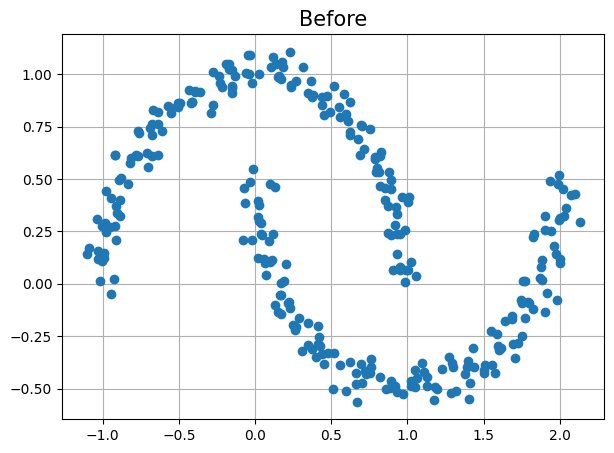

In [9]:
plt.figure(figsize=(7,5))
plt.title("Before", fontsize=15)
plt.plot(df[0], df[1], "o")
plt.grid()
plt.show()

TO-DO:


1.   Use DBSCAN (use scikit-library) for clustering provided data points above

*   Use eps=0.3, min_samples=5 (use default params for the others)

2. Draw the scatter plot to visualize the result in step 1
* Use "After - DBSCAN" title

3. Use k-means (use scikit-library) for clustering provided data points above
* Use n_clusters=2  (use default params for the others)

4. Draw the scatter plot to visualize the result in step 3
* Use "After - kMeans" title

5. Discuss the resulting plots derived in step 2 and 4 and explain what makes such difference in clusters



#### 1&2. Use DBSCAN for clustering provided data points above and Draw the scatter plot to visulize the result

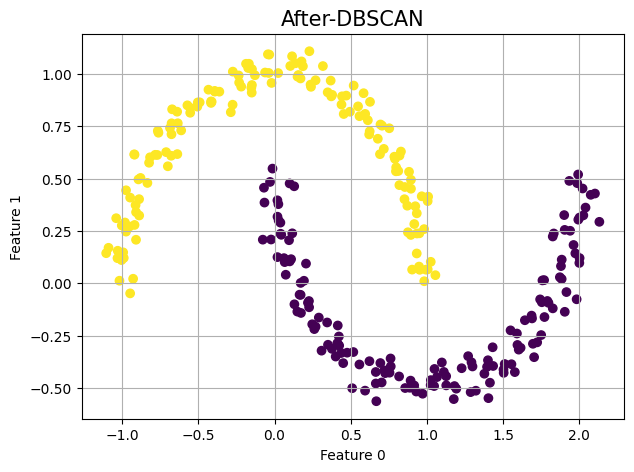

In [10]:
# DBSCAN 사용
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)

# scatter plot 그리기
plt.figure(figsize=(7,5))
plt.title("After-DBSCAN", fontsize=15)
plt.scatter(df[0], df[1], c=dbscan_labels, cmap='viridis', marker='o')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.grid(True)
plt.show()

#### 3&4. Use K-Means for clustering provided data points above and Draw the scatter plot to visulize the result

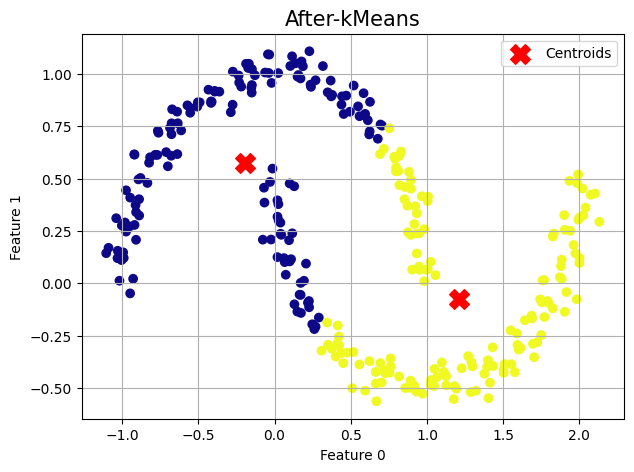

In [11]:
# K-Means
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(df)

plt.figure(figsize=(7,5))
plt.title("After-kMeans", fontsize=15)
plt.scatter(df[0], df[1], c=kmeans_labels, cmap="plasma", marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=200, color='red', label='Centroids')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.grid(True)
plt.legend()
plt.show()

#### 5. Discuss the resulting plots derived in step 2 and 4 and explain what makes such difference in clusters

두 플롯은 비선형적으로 분리되는 "moons" 데이터셋에 대해 두 알고리즘이 클러스터링하는 방식에 현저한 차이가 있음을 보여준다.

1. K-Means (중심점 기반)
- 목표 : 데이터 포인트를 k개의 그룹으로 분할하며, 각 데이터 포인트는 가장 가까운 평균 (중심점, Centroid)을 가진 클러스터에 속한다.
- 한계 : 블록하고 등방성인 형태 (구형 또는 Blob)를 위해 설계되었다. 중심점에 대한 유클리드 거리에만 의존하기 때문에 비블록(non-convex) 형태의 클러스터에는 적합하지 않다. "moons"데이터에서 K-Means는 단순히 두 질량 중심 사이의 직선을 그어 데이터의 자연스러운 구조를 가로질러 분할했다.

2. DBSCAN (밀도 기반)
- 목표 : 높은 밀도의 영역을 낮은 밀도의 영역으로 분리하여 클러스터를 정의한다.
- 강점 : 임의의 형태를 가진 클러스터를 찾을 수 있다. DBSCAN은 서로 가깝고 충분한 이웃 수를 가진 데이터 포인트를 연결한다. 두 초승달 모양이 자체적으로 밀도가 높고 낮은 밀도의 틈으로 분리되어 있기 때문에, DBSCAN은 각 모양의 곡선과 밀도를 완벽하게 따라가며 두 개의 자연스러운 클러스터를 정확하게 식별할 수 있었다.

<br>

-> "moons" 데이터셋과 같이 비블록 기하학적 구조를 가진 데이터셋의 경우, DBSCAN은 데이터 구조의 밀도와 연결성을 포착하기 때문에 우수한 반면, K-Means는 클러스터 중심점과 구형 가정에 의존하는 한계로 인해 적절한 결과를 얻지 못했다.

